### $\S$ 1. The Ordinary Least Square Regression

In [1]:
library(tidyverse)
df<- read_table2("C:/Users/Lee Sak Park/Desktop/Spring 2020/Linear Model/Notes/data_set.txt", 
                 col_names = FALSE)
colnames(df) = c("Y",'X1','X2','X3')
y = df$Y %>% as.matrix
J = rep(1, length(y))
X = cbind(J, df[c('X1','X2','X3')]) %>% as.matrix
colnames(y) = NULL
colnames(X) = NULL

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double()
)


#### Estimating $\hat{B}$

$\hat{B} = (X^T \cdot X)^{-1} \cdot X^T \cdot Y$ 

In [2]:
beta_hat = solve(t(X) %*% X) %*% t(X) %*% y
t(beta_hat)

4149.887,0.0007870804,-13.16602,623.5545


In [3]:
model = lm(Y ~ ., data = df)
model[1]

$coefficients
  (Intercept)            X1            X2            X3 
 4.149887e+03  7.870804e-04 -1.316602e+01  6.235545e+02

#### Fitting the model: finding $\hat{y}$

$\hat{y} = H \cdot y,  \ \  $ where $H = X (X^T  X)^{-1}  X^T $

In [4]:
H = X %*% solve(t(X) %*% X) %*% t(X)
y_hat = H %*% y

#checking everything is correct
sum(model$fitted.values %>% round(2) == y_hat %>% round(2)) == length(y)

[1] TRUE

In [5]:
dim(H)

[1] 52 52

__Properties of H:__

* H is idempotent

In [6]:
sum(H %*% H %>% round(2) == H %>% round(2)) == length(H)

[1] TRUE

#### Analysis of Variance

a. SSTO = $\Sigma_{i = 1}^{n} (y_i - \bar{y})^2 = y^t (I - \frac{1}{n} J) y$

b. SSR = $\Sigma_{i = 1}^{n} (\hat{y}_i - \bar{y})^2 = y^t (H - \frac{1}{n} J) y$

c. SSE = $\Sigma_{i = 1}^{n} (y_i - \hat{y}_i)^2 = y^t (I - H) y$

In [7]:
j = rep(1/length(H), length(H)) %>% matrix(nrow = dim(H)[1])
I = diag(dim(H)[1])

In [8]:
ssto = t(y) %*% (I - j) %*% y
ssr = t(y) %*% (H - j) %*% y
sse = t(y) %*% (I - H) %*% y

In [9]:
ssto_ssr_sse = c(ssto, ssr, sse) 
ssto_ssr_sse_matrix = ssto_ssr_sse %>% round(3) %>% matrix
rownames(ssto_ssr_sse_matrix) = c("SSTO","SSR","SSE")
ssto_ssr_sse_matrix

SSTO,974003471.4
SSR,973017941.6
SSE,985529.7


In [10]:
msr = ssr / 3
mse = sse  / 48
msr_mse = c(msr, mse)  %>% round(3) %>% as.matrix
rownames(msr_mse) = c("MSR", "MSE")
msr_mse

MSR,324339313.88
MSE,20531.87


__Now, let's compare the numbers above with r-outputs__

* anova(model)

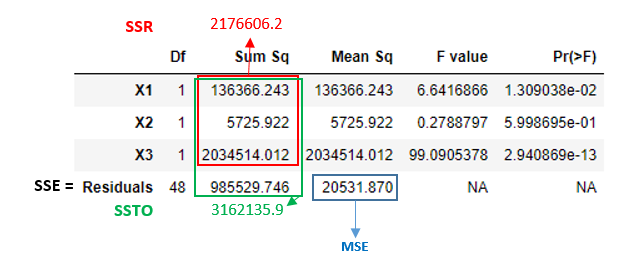

<center> $\dagger$ anova(model)

In [11]:
frame = rbind(anova(model)[2],sum(anova(model)[[2]]))
frame = frame[-c(1,2,3),]
frame[3] = frame[2] - frame[1]
frame = frame[c(2,3,1)] %>% as.matrix()
rownames(frame) = c("SSTO", "SSR", "SSE")
frame

SSTO,3162135.9
SSR,2176606.2
SSE,985529.7


* __summary(model)__

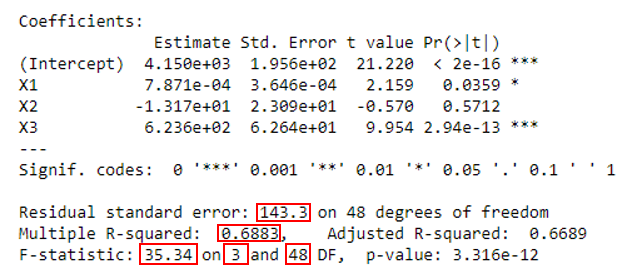

$\dagger$ Residual standard error = $\sqrt{MSE}$

$\dagger$ Multiple R-sqared  = $\frac{SSR}{SSTO} = 1- \frac{SSE}{SSTO}$

$\dagger$ F-statistic = $\frac{MSR}{MSE}$

$\dagger$ p-value = _**pf($F^{*}$, 3 (df1), 48 (df2))**_

#### Study of $\hat{B}$

$\hat{B} = (X^T \cdot X)^{-1} \cdot X^T \cdot Y$ 

$\Rightarrow$ Var$\big[ \hat{B} \big] = Var \big[ (X^T \cdot X)^{-1} \cdot X^T \cdot Y \big] $

$ = \big[ (X^T  X)^{-1}  X^T \big] \cdot$ Var $\big[ Y \big] \cdot \big[  (X^T  X)^{-1}  X^T \big]^T$

$ = \big[ (X^T  X)^{-1}  X^T \big] \cdot \sigma^2 I \cdot \big[  (X^T  X)^{-1}  X^T \big]^T$

$ = \sigma \big[ (X^T  X)^{-1}  X^T \big] \big[  (X^T  X)^{-1}  X^T \big]^T = \sigma \big[ (X^T  X)^{-1}  X^T \big] \big[  X (X^T  X)^{-1} \big]$ = **$\sigma (X^T  X)^{-1} $**

__$\Rightarrow \hat{Var} \big[ \hat{B} \big]$ = $\sqrt{MSE} \cdot (X^T  X)^{-1} $__

<span>&#8251;</span> $\sqrt{MSE}$ is a *__"Residual Standard Error"__* in summary(model)  

In [12]:
mse_square = summary(model)$sigma^2
var_b = mse_square * solve(t(X) %*% X)
var_b

3.824583e+04,-3.514821e-02,-3.707169e+03,9.716583e+02
-3.514821e-02,1.328996e-07,-6.761593e-04,-8.311720e-04
-3.707169e+03,-6.761593e-04,5.332281e+02,-1.591225e+02
9.716583e+02,-8.311720e-04,-1.591225e+02,3.923888e+03


In [13]:
std.errors = sqrt(diag(var_b)) %>% as.matrix 
rownames(std.errors) = c("intercept","x1","x2","x3")
std.errors

intercept,1.955654e+02
x1,3.645540e-04
x2,2.309173e+01
x3,6.264095e+01


__comparing between summary(model) and std.errors__

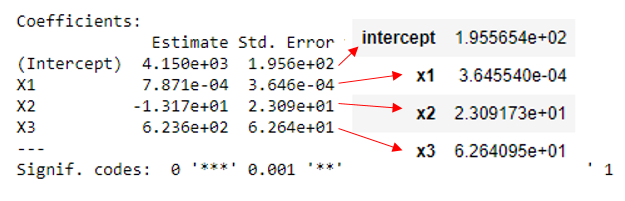

### $\S$ 2. The Extra Sum of Squares (a.k.a Sequential SS)

**Definition**:

SSR($X_1$ | $X_2$) = SSR($X_1, X_2$) - SSR($X_2$) = SSE($X2$) - SSE($X_1, X_2$)

**USE: Partial F-test**

- $H_0$: $B_q = B_{q+1} = ... = B_{p-1} = 0$

- $H_1$ : Not all $B_k$'s are zero, where k $\in {q, q+1, ..., p-1}$

- test statistic $F^{*}$ = $\frac{SSR(X_q, \dots, X_{p-1} | X-1 , \dots , X_{q-1}/(p-q)}{SSE_{Full} / (n-p)}$

__anova(model)__

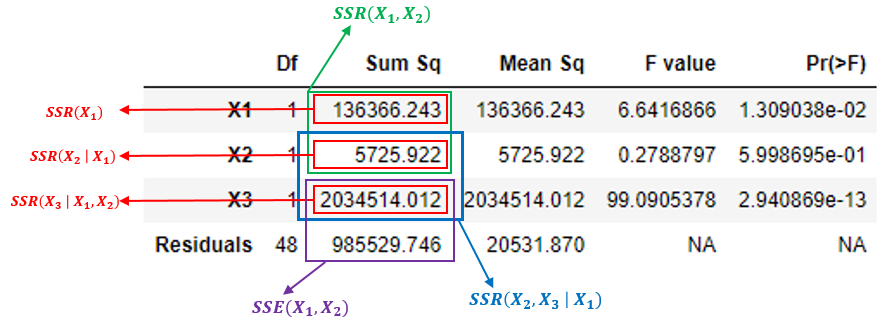

### $\S$ 3. Coefficients of Determination

1. $R^2$ = $\frac{SSR}{SSTO}$ = $1- \frac{SSE}{SSTO}$



2. $R^2_{adj}$ = $ 1 - \frac{SSE/(n-p)}{SSTO/(n-1)}$



3. $R^2_{Y_{1 | 2}}$ = $\frac{SSR(X_1 | X_2)}{SSE(X_2)} = \frac{SSR(X_1 | X_2)}{SSTO - SSR(X_2)}$

* summary(model)

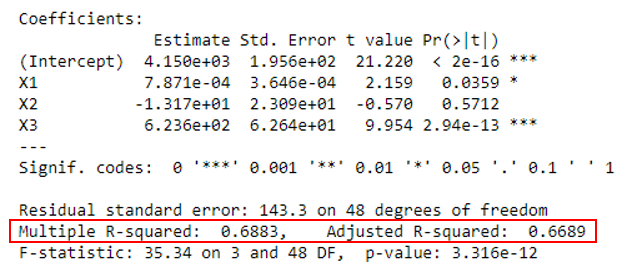

In [5]:
model = lm(Y~., data = df)

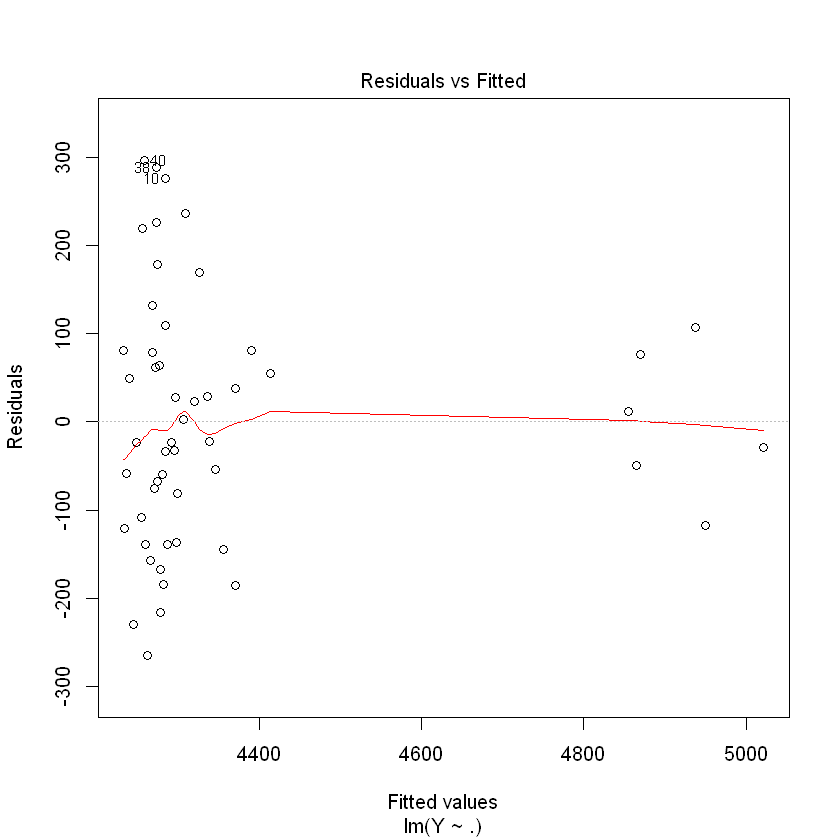

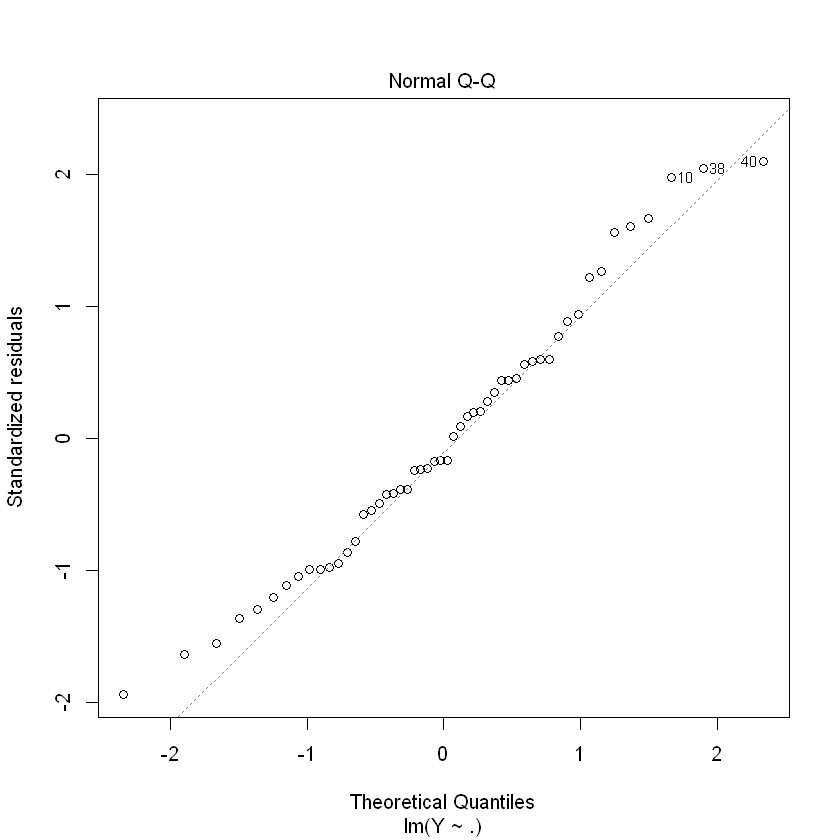

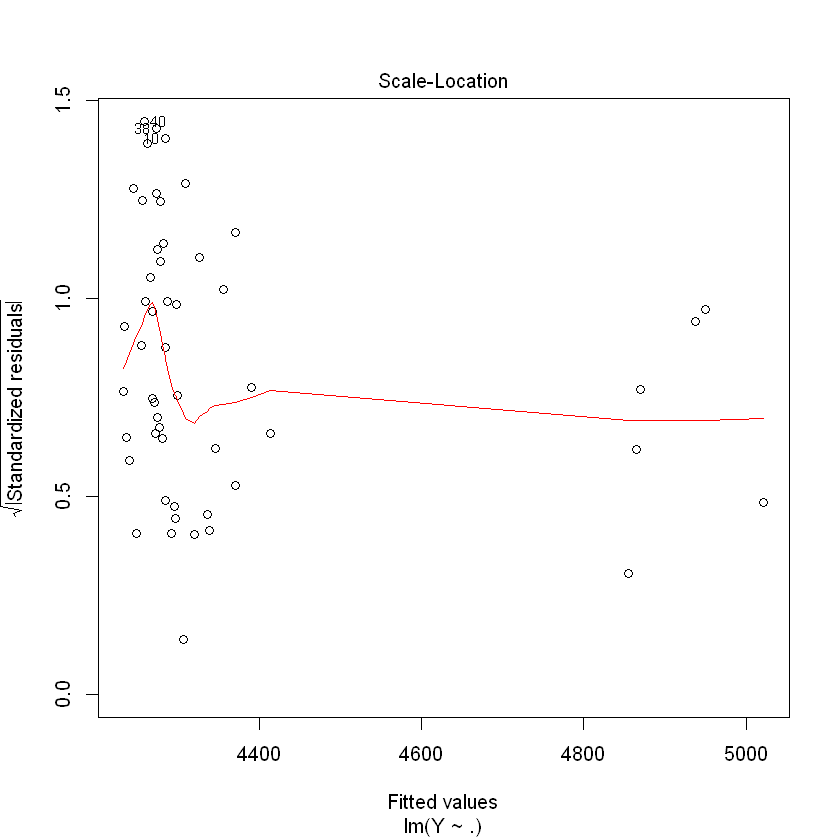

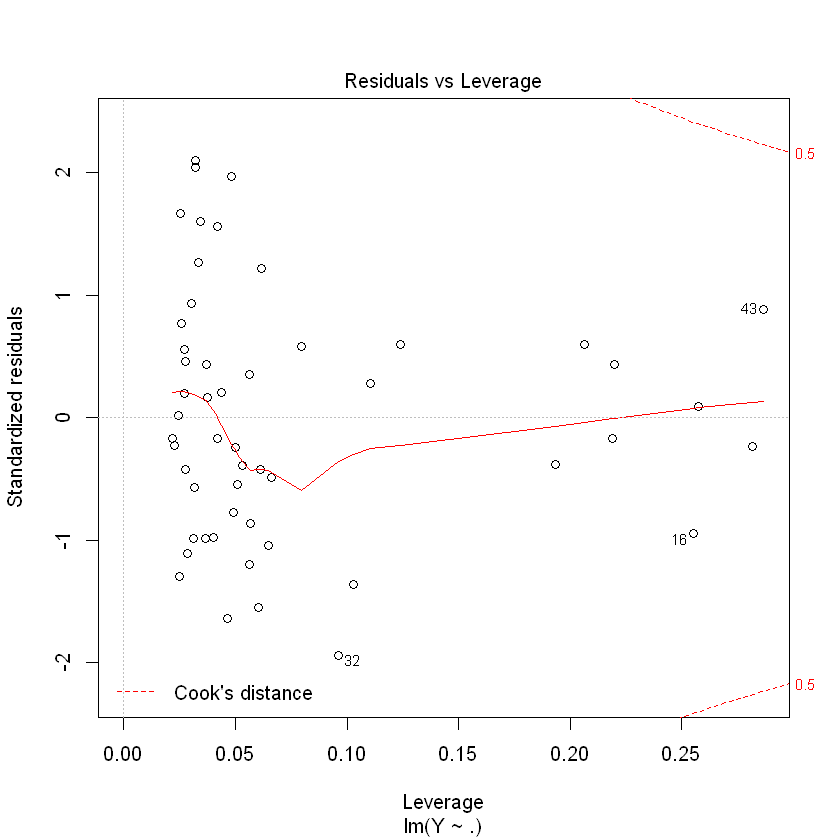

In [7]:
plot(model)